In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data
import scipy


In [3]:
patient_1 = cv2.imread ('1.jpg', cv2.IMREAD_GRAYSCALE)
patient_2 = cv2.imread ('2.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
#size of image = pixel x pixel (ex: 512x512)
#
def resize_image (pixel, image):
    ratio = pixel / image.shape[1]
    dimension = (pixel, int(patient_1.shape[0]*ratio))
    resized = cv2.resize(image, dimension, interpolation=cv2.INTER_AREA)
    return resized

In [7]:
def bright_contrast (image, contrast, brightness):
    return cv2.convertScaleAbs (image, contrast, brightness)

#bright_image = bright_contrast(patient_1, 30, 1)
#cv2.imshow("bright", bright_image)
#cv2.waitKey(0) 

In [8]:
#normalize between 0 and 1
import numpy as np
def normalize_image (image, coefficient):
    normalized_image = image.astype(np.float32) / coefficient
    return normalized_image
  
#normalized_image = normalize_image(patient_1)
#cv2.imshow("normalized", normalized_image)
#cv2.waitKey(0) 

In [9]:
def median_filter (image, kernel_size):
    return cv2.medianBlur(image, kernel_size)
                   
#filtered_image = median_filter(patient_1,3)
#cv2.imshow("filtered", filtered_image)
#cv2.waitKey(0) 

#img_blur = cv2.GaussianBlur(patient_1, (3,3), 0) 

In [10]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=patient_1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=patient_1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=patient_1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
#cv2.imshow('Sobel X', sobelx)
#cv2.waitKey(0)
#cv2.imshow('Sobel Y', sobely)
#cv2.waitKey(0)
#cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
#cv2.waitKey(0)

In [11]:
def calculate_glcm (image, distance, angle, level):
    #glcm = graycomatrix(patient_1, distances=[100], angles=[0], levels=256, symmetric=True, normed=True)
    glcm = graycomatrix(image, distance, angle, level, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation

In [13]:
def create_hist (image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

def calculate_hist (hist):
    mean_hist = np.mean (hist)
    median_hist = np.median (hist)
    std_hist = np.std (hist)
    skewness_hist = scipy.stats.skew(hist, axis=0, bias=True)
    kurtosis_hist = scipy.stats.kurtosis(hist, axis=0, fisher=True, bias=True)
    return mean_hist, median_hist, std_hist, skewness_hist, kurtosis_hist

In [5]:
def crop_image (image, x, y, w, h, output_path='cropped_image.jpg'):
#x, y, w, h = 200, 300, 400, 300  # Beispielkoordinaten
    """
    Crop the image to the specified dimensions and save it.

    Args:
        image (numpy.ndarray): The image to be cropped.
        x (int): The x-coordinate of the top-left corner of the cropping rectangle.
        y (int): The y-coordinate of the top-left corner of the cropping rectangle.
        w (int): The width of the cropping rectangle.
        h (int): The height of the cropping rectangle.
        output_path (str, optional): The path where the cropped image will be saved. Defaults to 'cropped_image.jpg'.

    Returns:
        bool: True if the image was successfully saved, False otherwise.

    Raises:
        ValueError: If the input image is not a valid numpy array or the coordinates are out of bounds.
    """
    if not isinstance(image, np.ndarray):
        raise ValueError("The input image must be a numpy array.")
    if x < 0 or y < 0 or x+w > image.shape[1] or y+h > image.shape[0]:
        raise ValueError("The cropping coordinates are out of image bounds.")
    cropped_image = image[y:y+h, x:x+w]
    return cv2.imwrite (output_path, cropped_image)
# Anzeigen des Original- und des zugeschnittenen Bildes
#cv2.imshow('Original Image', image)
#cv2.imshow('Cropped Image', cropped_image)
#cv2.waitKey(0)  # Warten, bis eine Taste gedrückt wird
#cv2.destroyAllWindows()

-1

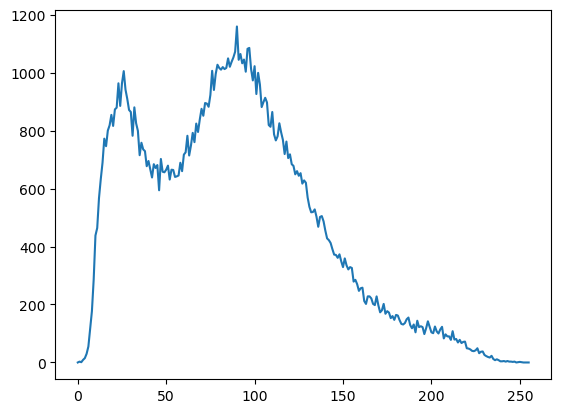

In [61]:
plt.plot (hist)

In [16]:
f = np.fft.fft2(cropped_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [6]:
cropped_image.shape

(300, 400)

In [ ]:
scipy.ndimage.median_filter(input, size=None, footprint=None, output=None, mode='reflect', cval=0.0, origin=0, *, axes=None)

In [15]:
med = scipy.ndimage.median_filter (cropped_image, )

In [16]:
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)  # Warten, bis eine Taste gedrückt wird

-1

In [17]:
cv2.imwrite ('cropped_image.png', cropped_image)

True